In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

In [ ]:
import csv
import random
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pandas as pd

dataset = pd.read_csv('tweet - Sheet1.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'tweet - Sheet1.csv'

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
data=[]
for i in range(0,4000):
  tweet = re.sub('[^a-zA-Z]', ' ', dataset['Tweet'][i])
  tweet=tweet.lower()
  tweet=tweet.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  tweet = [word for word in tweet if not word in set(all_stopwords)]
  tweet=' '.join(tweet)
  data.append(tweet)

In [ ]:
dates = dataset['Dates'].tolist()[:4000]

In [ ]:
df = pd.DataFrame({ 'Dates':dates,'Modified_Tweets': data})

In [ ]:
print(df)

In [ ]:
ndata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
tweet=""
for i in range(0,len(df)-1):
    date=df.Dates.iloc[i]  #checks two dates and combines them if same.
    next_date=df.Dates.iloc[i+1]
    if(str(date)==str(next_date)):
        tweet=tweet+df.Modified_Tweets.iloc[i]+" "
    if(str(date)!=str(next_date)):
        temp_df = pd.DataFrame([[date,
                                tweet]], columns = ['Date','Tweets']) #temp dataset to store values of dates and tweets.
        ndata = pd.concat([ndata, temp_df], axis = 0).reset_index(drop = True)
        tweet=" "

In [ ]:
print(ndata)

In [ ]:
readd=pd.read_csv('closing price  - Sheet1 (1).csv')
print(readd)

In [ ]:
#Adding a new columnn to the dataset for stock prices.
ndata['Prices']=""

In [ ]:
indx=0
for i in range (0,len(ndata)):
    for j in range (0,len(readd)):
        get_tweet_date=ndata.Date.iloc[i]
        get_stock_date=readd.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            ndata['Prices'].iloc[i] = int(readd.Close[j])

In [ ]:
print(ndata)

In [ ]:
#from tkinter.constants import N
mean=0
summ=0
count=0
for i in range(0,len(ndata)):
    if(ndata.Prices.iloc[i]!=""):
        summ=summ+int(ndata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ndata)):
    if(ndata.Prices.iloc[i]==""):
        ndata.Prices.iloc[i]=int(mean)

In [ ]:
print(ndata)

In [ ]:
ndata["Compound"] = ''
ndata["Negative"] = ''
ndata["Neutral"] = ''
ndata["Positive"] = ''
ndata

In [ ]:
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ndata.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', ndata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ndata['Compound'].iloc[indexx] = sentence_sentiment['compound']
        ndata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ndata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ndata['Positive'].iloc[indexx] = sentence_sentiment['compound']
    except TypeError:
        print (ndata.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
print(ndata)

% of positive tweets =  94.33962264150944
% of negative tweets =  0.0
% of neutral tweets =  5.660377358490567


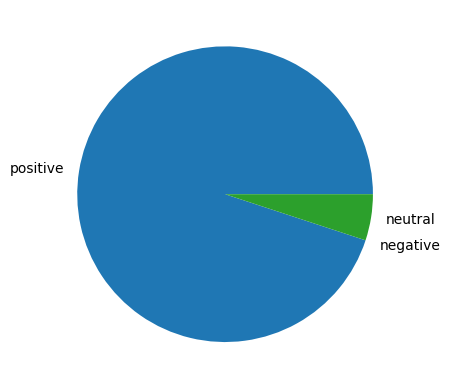

In [ ]:
posi = 0
nega = 0
neutral = 0

for i in range(0, len(ndata)):
    get_val = ndata.Compound[i]
    if float(get_val) < 0:
        nega += 1
    elif float(get_val) > 0:
        posi += 1
    else:
        neutral += 1

total_tweets = len(ndata)
posper = (posi / total_tweets) * 100
negper = (nega / total_tweets) * 100
neuper = (neutral / total_tweets) * 100

print("% of positive tweets = ", posper)
print("% of negative tweets = ", negper)
print("% of neutral tweets = ", neuper)

import matplotlib.pyplot as plt

arr = np.asarray([posper, negper, neuper], dtype=int)
plt.pie(arr, labels=['positive', 'negative', 'neutral'])
plt.show()

In [ ]:
newdf=ndata[['Date','Prices','Compound','Negative','Neutral','Positive']].copy()
newdf

,Date,Prices,Compound,Negative,Neutral,Positive
0,2022-09-29,268,0.9932,0.117,0.743,0.9932
1,NaN,291,0.0,0.0,0.0,0.0
2,2022-09-28,287,0.9976,0.093,0.757,0.9976
3,NaN,291,0.0,0.0,0.0,0.0
4,2022-09-27,282,0.9983,0.073,0.794,0.9983
5,2022-09-26,276,0.9989,0.09,0.745,0.9989
6,2022-09-25,291,0.9941,0.094,0.748,0.9941
7,2022-09-24,291,0.9986,0.067,0.744,0.9986
8,2022-09-23,275,0.999,0.084,0.753,0.999
9,2022-09-22,288,0.9988,0.096,0.742,0.9988


In [ ]:
train_starting_index = '0'
train_last_index = '46'
test_starting_index = '47'
test_last_index = '52'
train = newdf.loc[train_starting_index : train_last_index,:]
test = newdf.loc[test_starting_index:test_last_index,:]

In [ ]:
sentiment_list= []
for date, row in train.iterrows():
    sentiment_score = np.asarray([newdf.loc[date, 'Negative'],newdf.loc[date, 'Positive']])
    sentiment_list.append(sentiment_score)
df_train = np.asarray(sentiment_list)
print(df_train)

In [ ]:
sentiment_score_list = []
for date, row in test.iterrows():
    sentiment_score = np.asarray([newdf.loc[date, 'Negative'],newdf.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
df_test = np.asarray(sentiment_score_list)
print(df_test)

In [ ]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
rf = RandomForestRegressor()
rf.fit(df_train, y_train)
prediction = rf.predict(df_test)
print(prediction)

In [ ]:
idx= np.arange(int(test_starting_index),int(test_last_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [ ]:
predictions_df_

,Prices
47,292.80
48,299.33
49,283.70
50,293.27
51,287.20
52,294.96


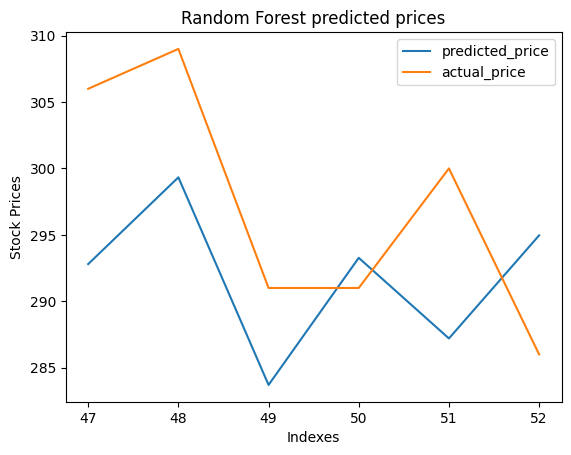

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")